In [1]:
import os
import h5py

import numpy as np
import matplotlib.pyplot as plt

from pathlib import Path

# Plot event score distribution

In [2]:
h5_dir = '/home/r10222035/SPANet2/data/triHiggs'
file_path = os.path.join(h5_dir, 'triHiggs_4b_PT40_test.h5')
with h5py.File(file_path, 'r') as f:
    y_test = f['CLASSIFICATIONS/EVENT/signal'][...]
    
file_path = os.path.join(h5_dir, 'triHiggs_4b_PT40_test-predict.h5')
with h5py.File(file_path, 'r') as f:
    y_prob = f['CLASSIFICATIONS/EVENT/signal'][...]

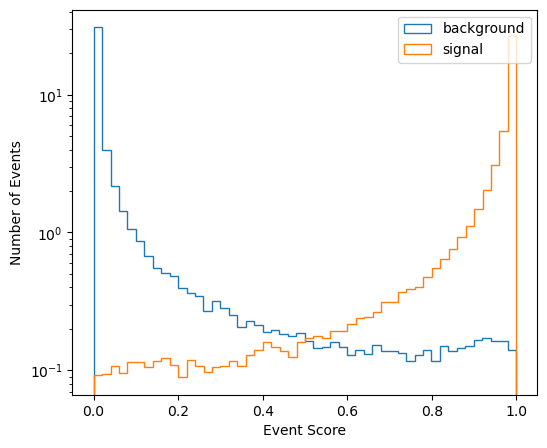

In [3]:
# plot event score distribution
y_pred = y_prob[:, 1]
y_pred_s = y_pred[y_test==1]
y_pred_b = y_pred[y_test==0]
fig, ax = plt.subplots(1, 1, figsize=(6, 5))
bins = 50
ax.hist(y_pred_b, bins=bins, histtype='step', label='background', density=True)
ax.hist(y_pred_s, bins=bins, histtype='step', label='signal', density=True)
ax.set_xlabel('Event Score')
ax.set_ylabel('Number of Events')

ax.set_yscale('log')
ax.legend()
plt.show()

In [4]:
np.save(f'../Upper_limit/SPANet_selection/sig.npy', y_pred_s)
np.save(f'../Upper_limit/SPANet_selection/bkg.npy', y_pred_b)

In [2]:
h5_dir = '../Sample/SPANet/'
file_path = os.path.join(h5_dir, 'triHiggs-4pT40_6b.h5')
with h5py.File(file_path, 'r') as f:
    y_test = f['CLASSIFICATIONS/EVENT/signal'][...]
    
file_path = os.path.join(h5_dir, 'triHiggs-4pT40_6b-4b_SPANet_predict.h5')
with h5py.File(file_path, 'r') as f:
    y_prob = f['CLASSIFICATIONS/EVENT/signal'][...]

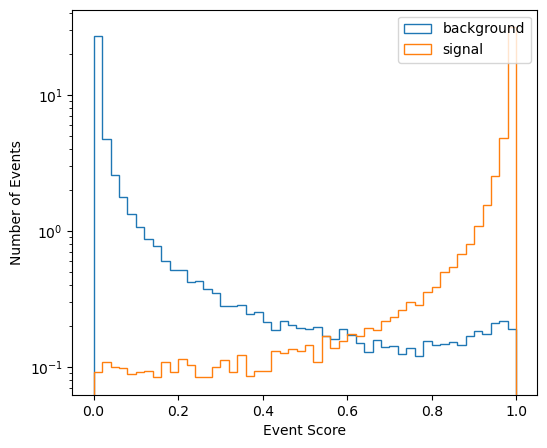

In [3]:
# plot event score distribution
y_pred = y_prob[:, 1]
y_pred_s = y_pred[y_test==1]
y_pred_b = y_pred[y_test==0]
fig, ax = plt.subplots(1, 1, figsize=(6, 5))
bins = 50
ax.hist(y_pred_b, bins=bins, histtype='step', label='background', density=True)
ax.hist(y_pred_s, bins=bins, histtype='step', label='signal', density=True)
ax.set_xlabel('Event Score')
ax.set_ylabel('Number of Events')

ax.set_yscale('log')
ax.legend()
plt.show()

In [4]:
np.save(f'../Upper_limit/SPANet_selection/sig-1M.npy', y_pred_s)
np.save(f'../Upper_limit/SPANet_selection/bkg-1M.npy', y_pred_b)

# TRSM

## 5 mass points mixed: 4b 250k sig + 1M bkg; 6b 10k sig + 50k bkg

In [ ]:
m3_m2_list = [(420, 280), (500, 275), (500, 300), (520, 325), (500, 350)]
h5_dir = Path('../Sample/SPANet/TRSM')

for m3, m2 in m3_m2_list:
    six_b_test_path = h5_dir / f'TRSM_{m3}_{m2}/gghhh-4pT40_6b-1-mix_5-4b_SPANet_predict.h5'

    with h5py.File(six_b_test_path, 'r') as f:
        y_prob = f['SpecialKey.Classifications/EVENT/signal'][...]
        y_pred = y_prob[:, 1]
    output_dir = Path(f'../Upper_limit/SPANet_selection/TRSM/TRSM_{m3}_{m2}')
    output_dir.mkdir(parents=True, exist_ok=True)

    np.save(output_dir / f'sig-mix_5-250k.npy', y_prob)

six_b_test_path = h5_dir / f'pp6b-4pT40_6b-1-mix_5-4b_SPANet_predict.h5'

with h5py.File(six_b_test_path, 'r') as f:
    y_prob = f['SpecialKey.Classifications/EVENT/signal'][...]
    y_pred = y_prob[:, 1]
output_dir = Path(f'../Upper_limit/SPANet_selection/TRSM/pp6b')
output_dir.mkdir(parents=True, exist_ok=True)

np.save(output_dir / f'bkg-mix_5-250k.npy', y_pred)

## 5 mass points mixed: 4b 1M sig + 1M bkg; 6b 10k sig + 50k bkg

In [2]:
m3_m2_list = [(420, 280), (500, 275), (500, 300), (520, 325), (500, 350)]
h5_dir = Path('../Sample/SPANet/TRSM')

for m3, m2 in m3_m2_list:
    six_b_test_path = h5_dir / f'TRSM_{m3}_{m2}/gghhh-4pT40_6b-test-4b_SPANet_predict-mix_5-1M.h5'

    with h5py.File(six_b_test_path, 'r') as f:
        y_prob = f['SpecialKey.Classifications/EVENT/signal'][...]
        y_pred = y_prob[:, 1]
    output_dir = Path(f'../Upper_limit/SPANet_selection/TRSM/TRSM_{m3}_{m2}')
    output_dir.mkdir(parents=True, exist_ok=True)

    np.save(output_dir / f'sig-mix_5-1M.npy', y_prob)

six_b_test_path = h5_dir / f'pp6b-4pT40_6b-test-4b_SPANet_predict-mix_5-1M.h5'

with h5py.File(six_b_test_path, 'r') as f:
    y_prob = f['SpecialKey.Classifications/EVENT/signal'][...]
    y_pred = y_prob[:, 1]
output_dir = Path(f'../Upper_limit/SPANet_selection/TRSM/pp6b')
output_dir.mkdir(parents=True, exist_ok=True)

np.save(output_dir / f'bkg-mix_5-1M.npy', y_pred)